In [1]:
library(Signac)
library(Seurat)
library(ggplot2)

Attaching SeuratObject



In [2]:
seurat <- readRDS("/Users/dominik.klein/data/seurat_new_annotations.rds")

In [3]:
markers_fev_delta <- read.csv("diff_peaks_signac_fev_delta0.csv")

In [4]:
endocrine_cell_types_red <- c(
    "Eps. progenitors",
    "Fev+ Delta,0",
    "Fev+ Delta,1",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
)

In [5]:
cols <- c( 'Prlf. Ductal'='#f7b6d2', 'Ductal'='#d62728', 'Imm. Acinar'='#ffeb3b', 'Mat. Acinar'='#98df8a',
    'Alpha'='#1f77b4', 'Beta'='#ff7f0e', 'Delta'='#279e68', 'Eps. progenitors'='#aa40fc', 'Epsilon'='#8c564b',
       'Fev+'='#e377c2', 'Fev+ Alpha'='#b5bd61', 'Fev+ Beta'='#42f5ec', 'Fev+ Delta'='#aec7e8', 'Fev+ Delta,0'='#17becf', 'Fev+ Delta,1'='#98df8a',
         'Ngn3 high cycling'='#adf542',
        'Ngn3 high,0'='#ff9896', 'Ngn3 high'='#ff9896', 'Ngn3 high,1'='#f0b98d', 'Ngn3 low'='#c5b0d5')

In [6]:
Idents(seurat) = seurat@meta.data[["refinement"]]

In [7]:
endocrine_cell_types = c('Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high,0', 'Ngn3 high,1', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta,0', 'Fev+ Delta,1', 'Alpha', 'Beta', 'Delta', 'Epsilon')
Idents(seurat) <- factor(Idents(seurat), levels = endocrine_cell_types)

In [8]:
seurat <- subset(x=seurat, idents= endocrine_cell_types_red)

In [9]:
head(markers_fev_delta,1)

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3-137328983-137329833,1.36536e-34,2.788712,0.276,0.041,3.116557e-29


In [10]:
range <- markers_fev_delta$X[[1]]

In [11]:
p <- CoveragePlot(
  object = seurat,
  region = range,
  annotation = TRUE,
  peaks = TRUE,
  extend.upstream = 300,
  extend.downstream = 300,
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


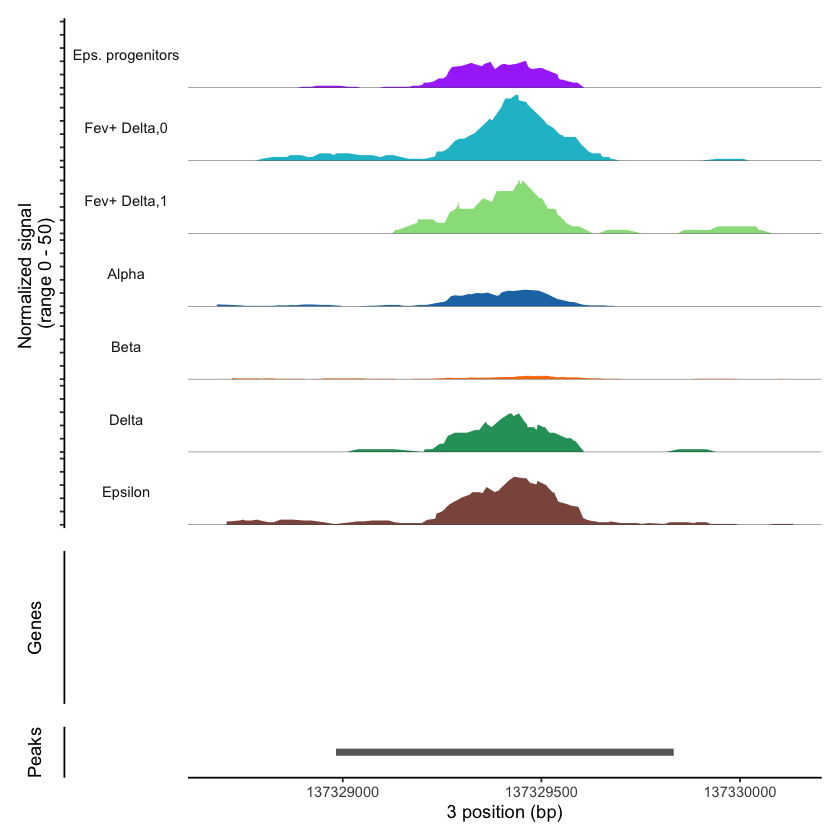

In [12]:
p & scale_fill_manual(values=cols)